First we do the import of the needed libraries

In [81]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [82]:
Not_available = ['Not specified', 'Not available', 'Not Priced']
df = pd.read_csv('car_data.csv', sep = ',', index_col= 'id', na_values=Not_available)
df

,Model,Year,Status,Mileage,Price,MSRP
id,,,,,,
0,2022 Acura TLX A-Spec,2022,New,NaN,"$49,445","MSRP $49,445"
1,2023 Acura RDX A-Spec,2023,New,NaN,"$50,895",NaN
2,2023 Acura TLX Type S,2023,New,NaN,"$57,745",NaN
3,2023 Acura TLX Type S,2023,New,NaN,"$57,545",NaN
4,2019 Acura MDX Sport Hybrid 3.0L w/Technology ...,2019,Used,"32,675 mi.","$40,990",$600 price drop
...,...,...,...,...,...,...
10005,2023 Volkswagen Atlas 3.6L SE w/Technology,2023,New,NaN,"$47,346",NaN
10006,2023 Volkswagen Taos 1.5T SE,2023,New,NaN,"$30,895",NaN
10007,2012 Volkswagen Beetle,2012,Used,"100,395 mi.","$9,994",$252 price drop


In [83]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 115762 entries, 0 to 10009
Data columns (total 6 columns):
 #   Column   Non-Null Count   Dtype 
---  ------   --------------   ----- 
 0   Model    115762 non-null  object
 1   Year     115762 non-null  int64 
 2   Status   115762 non-null  object
 3   Mileage  67894 non-null   object
 4   Price    115110 non-null  object
 5   MSRP     43665 non-null   object
dtypes: int64(1), object(5)
memory usage: 6.2+ MB


In [84]:
df.isna().sum().sort_values(ascending = False)

MSRP       72097
Mileage    47868
Price        652
Model          0
Year           0
Status         0
dtype: int64

Since the ammount of missing values on the MSRP and Mileage columns surpasses the 10%, the only option is to delete these columns, as for the price, we´ll convert it into a float in order to replace missing values

In [85]:
df.drop(columns = ['MSRP','Mileage'], inplace = True)
def clean_currency(x):
    """ If the value is a string, then remove currency symbol and delimiters
    otherwise, the value is numeric and can be converted
    """
    if isinstance(x, str):
        return(x.replace('$', '').replace(',', ''))
    return(x)
df['Price'] = df['Price'].apply(clean_currency).astype('float')
df['Price'] = df['Price'].fillna(df['Price'].mode()[0])
df.info()
df.isna().sum().sort_values(ascending = False)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 115762 entries, 0 to 10009
Data columns (total 4 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Model   115762 non-null  object 
 1   Year    115762 non-null  int64  
 2   Status  115762 non-null  object 
 3   Price   115762 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 4.4+ MB


Model     0
Year      0
Status    0
Price     0
dtype: int64

Since our data is too big to process accordingly, we'll take a sample of 1000 rows

In [86]:
df_sample = df.iloc[:100]
df_sample

,Model,Year,Status,Price
id,,,,
0,2022 Acura TLX A-Spec,2022,New,49445.0
1,2023 Acura RDX A-Spec,2023,New,50895.0
2,2023 Acura TLX Type S,2023,New,57745.0
3,2023 Acura TLX Type S,2023,New,57545.0
4,2019 Acura MDX Sport Hybrid 3.0L w/Technology ...,2019,Used,40990.0
...,...,...,...,...
95,2023 Acura Integra A-Spec Technology,2023,New,37395.0
96,2023 Acura Integra w/A-Spec Tech Package,2023,New,38095.0
97,2023 Acura TLX Technology,2023,New,45245.0


In [87]:
df_sample.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Model   100 non-null    object 
 1   Year    100 non-null    int64  
 2   Status  100 non-null    object 
 3   Price   100 non-null    float64
dtypes: float64(1), int64(1), object(2)
memory usage: 3.9+ KB


We check if the current dataset has any missing values

In [88]:
df_sample.isna().sum().sort_values(ascending = False)

Model     0
Year      0
Status    0
Price     0
dtype: int64

In [89]:
def Categorical_Variables(cat):
    
    #Rows
    from math import ceil
    filas = ceil(cat.shape[1] / 2)

    #Graph
    f, ax = plt.subplots(nrows = filas, ncols = 2, figsize = (16, filas * 6))

    #One Dimentional Graph
    ax = ax.flat 

    #Variable Cycle
    for cada, variable in enumerate(cat):
        cat[variable].value_counts().plot.barh(ax = ax[cada])
        ax[cada].set_title(variable, fontsize = 12, fontweight = "bold")
        ax[cada].tick_params(labelsize = 12)

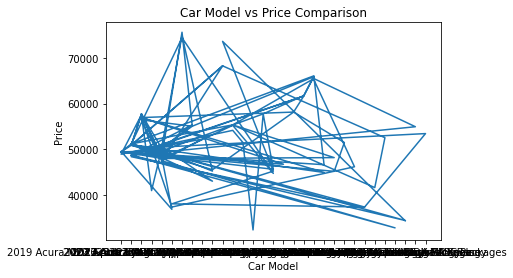

In [90]:

Price = df_sample["Price"]
Model = df_sample["Model"]

plt.plot(Model, Price)
plt.ylabel('Price')
plt.xlabel('Car Model')
plt.title('Car Model vs Price Comparison')

plt.show()